<a href="https://colab.research.google.com/github/Ulton321/HTML-CAR-WEBSITE-FOR-MCLAREN/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Week 2 Report**
Men MonyVann,Leang Tech Ngoun, Chan Chivi Throkal, Makara Heng, Lim seanglong, Son SophakOtra

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

##**Summary**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/lfw_funneled.zip


##**Feature Extraction:**
###**Principal Component Analysis (PCA)**
####**Reason:**
PCA identifies the most important features in the data by capturing the directions of maximum variance. In the context of face recognition, these features correspond to patterns and structures that are crucial for discriminating between different faces. By focusing on the principal components, PCA helps extract relevant facial features.

<br>

####**Additionally, PCA also facilitates our ML model with:**

- Dimensionality Reduction:
Face images often have high dimensionality due to the large number of pixels. PCA can effectively reduce the dimensionality by transforming the original data into a new set of uncorrelated variables (principal components) that capture most of the variance in the data. This reduction is beneficial for computational efficiency and memory storage.

- Decorrelation of Features:
The principal components obtained through PCA are orthogonal, meaning they are uncorrelated. This decorrelation can be advantageous in face recognition, as it helps to remove redundancy in the data and ensures that the extracted features are independent. Independent features can be more informative and contribute to better discrimination.

- Noise Reduction:
PCA tends to reduce the impact of noise in the data by emphasizing the directions of maximum variance and de-emphasizing directions with lower variance. In face images, noise can arise from various sources, such as lighting conditions or image acquisition devices. PCA helps to focus on the underlying patterns while mitigating the influence of noise.

###**Other considered dimensional reduction method: T-SNE**
- **From our past experience** with using T-SNE on our **spam detection**, we found that it gave us a much better result with roughly **15%** better accuracy rate than PCA when it comes to dimensional reduction. Upon further research, we found that T-SNE was quite fitting to what we want, with it being a non-linear method that could preserve the local neighborhood structure of the data. This means that t-SNE is better at capturing complex relationships between facial features and can be more effective at distinguishing between similar faces.
Therefore, we proceeded to run it on our face recognition SVM model as well.
However, it has proven itself to be extremely computationally expensive where PCA took us about 4 minutes for the grid search of 240 fits, T-SNE took more than 88 mins on 10 fits *(image of the test will be attached below)*.
At the moment, we haven't found a way to make it run using less time so we decided to put the T-SNE project on hold for the time being.


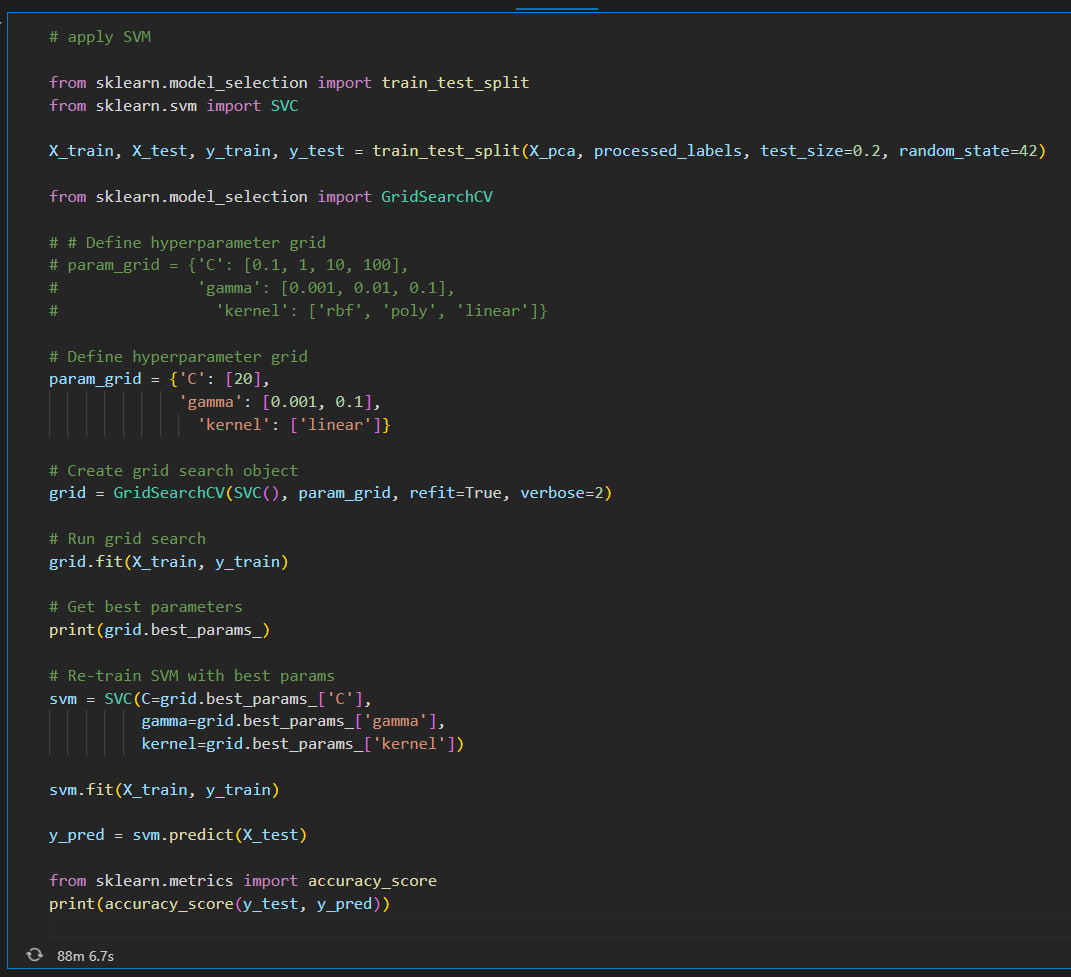

## **Algorithm/ML Model we have tried:**
  We have tried several algorithm including SVM, LDA, random forest and currently we have decided on **SVM and PCA** for the time being. The reasons are mentioned as below.
###**Algorithms tried**
###**Support Vector Machine (SVM):**
####**Reasons:**
Face recognition requires that we work with non-linear high dimensional data where each pixel contribute to the number of features we have to work on and SVM is known to do well in both categoies. Using its kernel trick, SVMs can map the data into a higher-dimensional space, making it easier to find a hyperplane that separates different classes and turning non-linear relationships into linear one. So far, it has been the most tested and best performing model at 65% of F1 and accuracy rate.

###**Random Forest:**
####**Reasons:**
Random forest was chosen because it can handle complex and non-linear relationships within high-dimensional data, such as facial images. Moreover, its ensemble nature of Random Forest(using multiple decision trees),allows it to capture intricate patterns and variations present in faces in the wild and it is also much more robust to overfitting than a single decision tree. However, its result has been quite disappointing at less than 50% of F1 and accuracy score.

###**Linear Discriminant Analysis (LDA):**
####**Reasons:**

We have only learned of the algorithm recently so our understanding of it is still limited and may be insufficient. However, this algorithm has given a surprisingly high F1 and accuracy rate of 97% which at this point is too terrifyingly optimistic and we wish to investigate it further the following week.(which is much higher than the 65% on SVM model but it is still in its testing state so we are still biased toward SVM over LDA for its trustworthiness so far)
From our understanding, LDA projects the high-dimensional data onto a lower-dimensional subspace that captures the most relevant information for class discrimination. This projection is performed by finding a set of linear transformations that maximize the ratio of between-class variance to within-class variance.




##**Evaluation Metrics**
###**Reason:**
- Accuracy: was chosen for evaluating the performance of our facial recognition model, and it provides a straightforward measure of how well the model is correctly classifying faces. Accuracy provides a general overview of how well the model is performing across all classes (individuals). It gives a sense of the model's ability to correctly identify and distinguish between different faces.


- F1 Score: a metric that combines both precision and recall, providing a balanced measure of a model's performance. In facial recognition, it's common for the dataset to be imbalanced, meaning that some individuals may have more instances (images) than others. The F1 score considers both false positives (misclassifying a non-matching face as a match) and false negatives (failing to recognize a matching face). Additionally, F1 score is sensitive to the model's ability to correctly identify individuals while managing false positives and false negatives, making it a suitable metric for evaluating real-world scenarios with varying lighting conditions, poses, and expressions.

- Confusion Matrix: provides a detailed breakdown of the model's predictions and allows for the calculation of various metrics, including accuracy. A confusion matrix breaks down the model's predictions into four categories: true positives (correctly identified instances of a class), true negatives (correctly rejected instances), false positives (incorrectly identified instances), and false negatives (incorrectly rejected instances). This level of detail allows for a more nuanced understanding of the model's performance.

In [ ]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Constants
DATA_DIR = 'lfw_funneled'
MIN_IMAGES_THRESHOLD = 20

data = []
labels = []
image_dimensions = []
num_images_per_person = []

for person in os.listdir(DATA_DIR):
    person_dir = os.path.join(DATA_DIR, person)
    if os.path.isdir(person_dir):
        images = []
        for filename in os.listdir(person_dir):
            if filename.lower().endswith('.jpg'):
                image_path = os.path.join(person_dir, filename)
                img = imread(image_path, as_gray=True)  # Load image as grayscale
                if img is not None:
                    # Convert image to numpy array and append to the 'images' list
                    img_array = np.array(img)
                    images.append(img_array.flatten())

                    # Store image dimensions (height and width)
                    image_dimensions.append(img_array.shape)

        # Check if the person has minimum images required
        if len(images) >= MIN_IMAGES_THRESHOLD:
            num_images_per_person.append(len(images))
            data.extend(images)
            labels.extend([person] * num_images_per_person[-1])

In [ ]:
print(labels)

['Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Tiger_Woods', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arnold_Schwarzenegger', 'Arn

In [ ]:
# Calculate mean and standard deviation of image dimensions
mean_height = np.mean([dim[0] for dim in image_dimensions])
mean_width = np.mean([dim[1] for dim in image_dimensions])
std_height = np.std([dim[0] for dim in image_dimensions])
std_width = np.std([dim[1] for dim in image_dimensions])

print(f"Mean Height: {mean_height}, Mean Width: {mean_width}")
print(f"Standard Deviation Height: {std_height}, Standard Deviation Width: {std_width}")


Mean Height: 250.0, Mean Width: 250.0
Standard Deviation Height: 0.0, Standard Deviation Width: 0.0


In [ ]:
df = pd.DataFrame({'name': labels})

# Group by 'name' and count the occurrences, then reset the index
result_df = df.groupby('name').size().reset_index(name='num of pic')

# Save the result as a CSV file
result_df.to_csv('output_table.csv', index=False)

result_df.info

<bound method DataFrame.info of                 name  num of pic
0   Alejandro_Toledo          39
1       Alvaro_Uribe          35
2    Amelie_Mauresmo          21
3       Andre_Agassi          36
4     Angelina_Jolie          20
..               ...         ...
57         Tom_Ridge          33
58        Tony_Blair         144
59       Vicente_Fox          32
60    Vladimir_Putin          49
61      Winona_Ryder          24

[62 rows x 2 columns]>

In [ ]:
# Convert pixel values to range [0, 1]
processed_images = np.array(data) / 255.0

print(processed_images.shape)

(3023, 62500)


In [ ]:
# Apply StandardScaler from sklearn
scaler = StandardScaler()
scaled_images = scaler.fit_transform(data)

print(scaled_images.shape)

(3023, 62500)


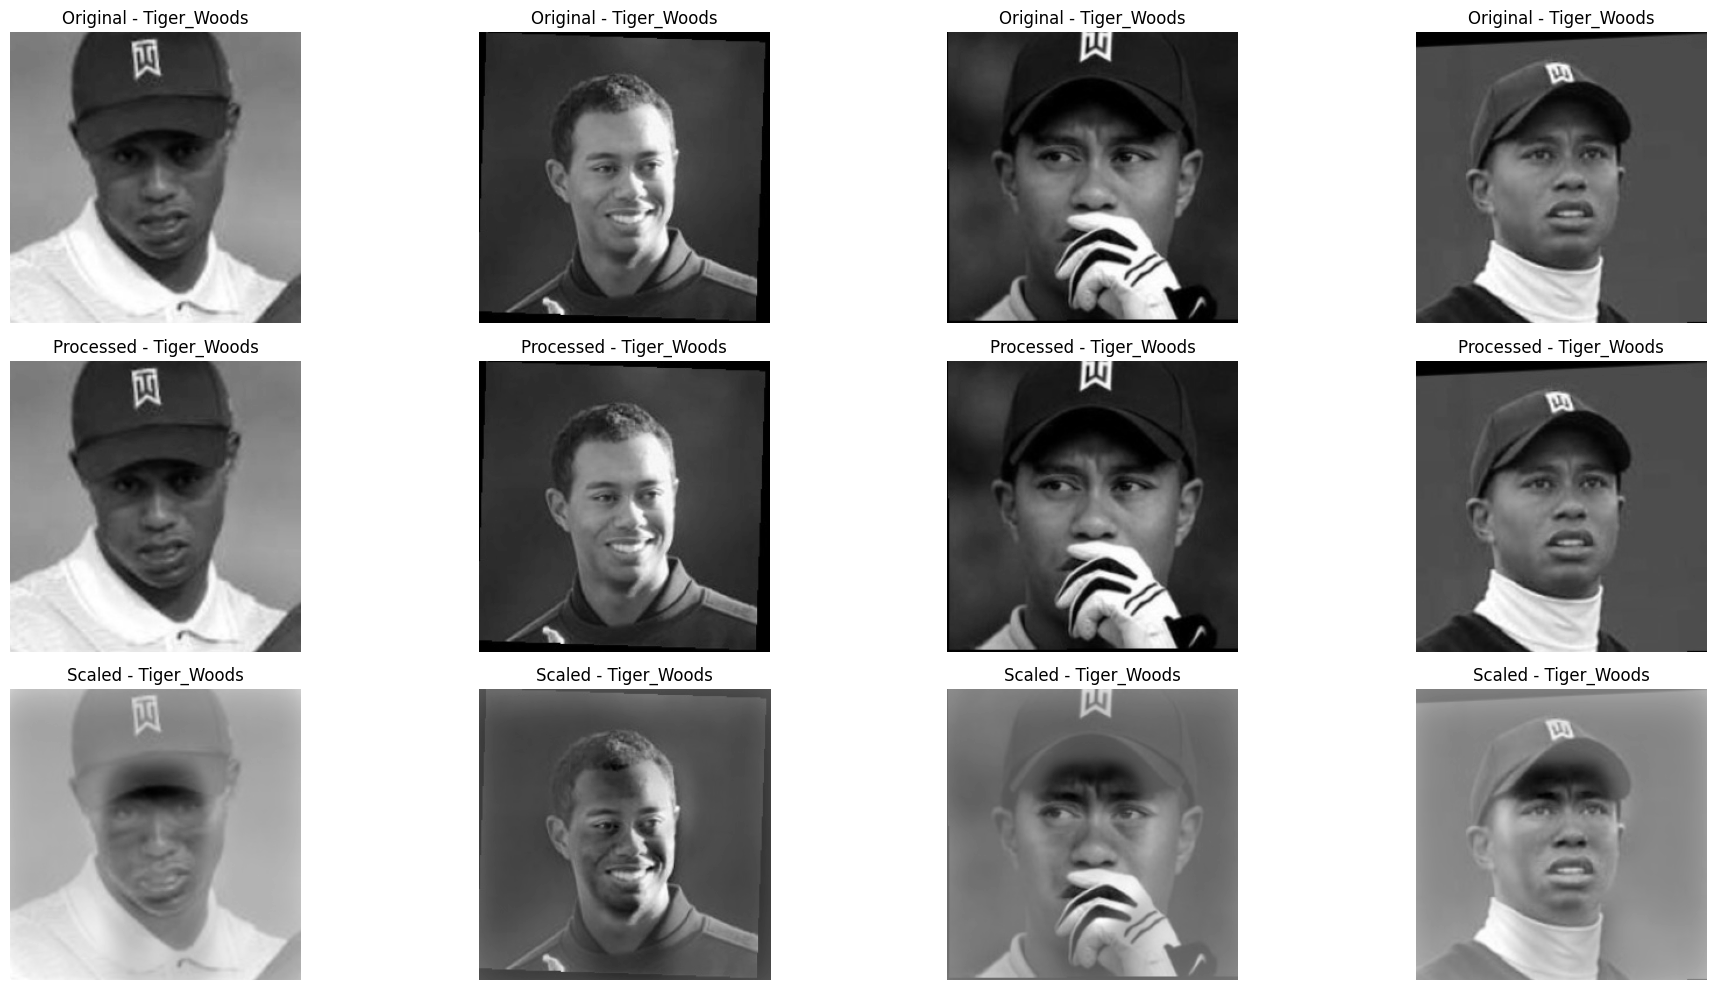

In [ ]:

# Plot a few original and scaled images for comparison
num_images_to_display = min(4, len(data))  # Choose the number of images to display
fig, ax = plt.subplots(3, num_images_to_display, figsize=(20, 10))

for i in range(num_images_to_display):
        # Original Images
        orig_dim = image_dimensions[i]
        ax[0, i].imshow(data[i].reshape(orig_dim), cmap='gray')
        ax[0, i].set_title(f'Original - {labels[i]}')
        ax[0, i].axis('off')

         # Processed Images
        orig_dim = image_dimensions[i]
        ax[1, i].imshow(processed_images[i].reshape(orig_dim), cmap='gray')
        ax[1, i].set_title(f'Processed - {labels[i]}')
        ax[1, i].axis('off')

        # Scaled Images
        orig_dim = image_dimensions[i]
        ax[2, i].imshow(scaled_images[i].reshape(orig_dim), cmap='gray')
        ax[2, i].set_title(f'Scaled - {labels[i]}')
        ax[2, i].axis('off')


plt.tight_layout()
plt.show()

In [ ]:
# store the path of the processed images

origin = "lfw_funneled/"
# get the length of duplicate elements in the list
from collections import Counter
d = Counter(labels)

image_path = []
key = []
value = []

# loop with the amount of d
for i in range(len(d)):
    # get the key of the dictionary
    key.append(list(d.keys())[i])
    # get the value of the dictionary
    value.append(list(d.values())[i])

for i in range(len(d)):
    for j in range(value[i]):
        # get the index of the key
        index = labels.index(key[i])

        # get the image path
        image_path.append(origin + key[i] + "/" + key[i] + "_" + "{:04d}".format(j+1) + ".jpg")

print(image_path)

['lfw_funneled/Tiger_Woods/Tiger_Woods_0001.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0002.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0003.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0004.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0005.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0006.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0007.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0008.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0009.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0010.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0011.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0012.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0013.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0014.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0015.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0016.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0017.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0018.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0019.jpg', 'lfw_funneled/Tiger_Woods/Tiger_Woods_0020.jpg', 'lfw_funneled/Tiger

In [ ]:
import os
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for image_pat in image_path:
    image = cv2.imread(image_pat)

    subfolder = image_pat.split('/')[1]
    dest_folder = os.path.join('processed_faces', subfolder)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    image_name = image_pat.split('/')[-1]

    faces = face_cascade.detectMultiScale(image, 1.1, 4)

    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (256, 256))

        face_file = os.path.join(dest_folder, image_name)
        cv2.imwrite(face_file, face)

In [ ]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Constants
DATA_DIR = 'lfw_funneled'
MIN_IMAGES_THRESHOLD = 20

data = []
labels = []
image_dimensions = []
num_images_per_person = []

for person in os.listdir(DATA_DIR):
    person_dir = os.path.join(DATA_DIR, person)
    if os.path.isdir(person_dir):
        images = []
        for filename in os.listdir(person_dir):
            if filename.lower().endswith('.jpg'):
                image_path = os.path.join(person_dir, filename)
                img = imread(image_path, as_gray=True)  # Load image as grayscale
                if img is not None:
                    # Convert image to numpy array and append to the 'images' list
                    img_array = np.array(img)
                    images.append(img_array.flatten())

                    # Store image dimensions (height and width)
                    image_dimensions.append(img_array.shape)

        # Check if the person has minimum images required
        if len(images) >= MIN_IMAGES_THRESHOLD:
            num_images_per_person.append(len(images))
            data.extend(images)
            labels.extend([person] * num_images_per_person[-1])

We had initially fitted PCA as our feature extractor, but it only achieved around 65% for both the unweighted accuracy and F1-score. We then tested linear discriminant analysis as our feature extractor, based on a report we found on the web, and the results we got were unbelievably high, with both the unweighted accuracy and F1-score being around 97%. We might have done something wrong, but we still believe that LDA can be used with SVM as a classifier to achieve a better and accurate performance for our model.

In [ ]:
# apply PCA

from sklearn.decomposition import PCA

X = np.array(data)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=150)
X_pca = pca.fit_transform(X_std)



##**SVM**

Here, we have split the processed data into training and testing sets.

We have also implemented a grid search to find the best hyperparameters for the Support Vector Machine (SVM) model. The hyperparameter grid is defined in param_grid, which includes different values for the regularization parameter c, the kernel coefficient gamma, and the kernel type.

During the grid search, grid.fit(X_train, y_train), all combinations of hyperparameters are tried, and the model's performance is evaluated using cross-validation on the training set, with the best combination found being {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}.

After the grid search is completed, the best parameters found are stored in best_params.

A new SVM classifier is then created (svm) with the best parameters obtained from the grid search. The SVM classifier is then trained on the training set using the fit method.

Finally, the trained SVM classifier is used to predict the labels for the testing set, and the predicted labels are stored in. The code then calculates and prints the accuracy score by comparing the predicted labels with the true labels.

In [ ]:
# apply SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
                'kernel': ['rbf', 'poly', 'linear']}

# Create grid search object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Run grid search
grid.fit(X_train, y_train)

# Get best parameters
print(grid.best_params_)

# Re-train SVM with best params
svm = SVC(C=grid.best_params_['C'],
          gamma=grid.best_params_['gamma'],
          kernel=grid.best_params_['kernel'])

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.4s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.7s
[CV] END ..................C=0.1, gamma=0.001, 

#**Unweighted Accuracy, F1-Score, and Confusion Matrix**

This cell is for printing the unweighted accuracy and F1 scores of the model. We have also printed a confusion matrix to analyze our data, only to confuse ourselves in the process. Both the accuracy and F1 score are around 97%.

Accuracy: 0.5173553719008265
F1 score: 0.5070061677458497


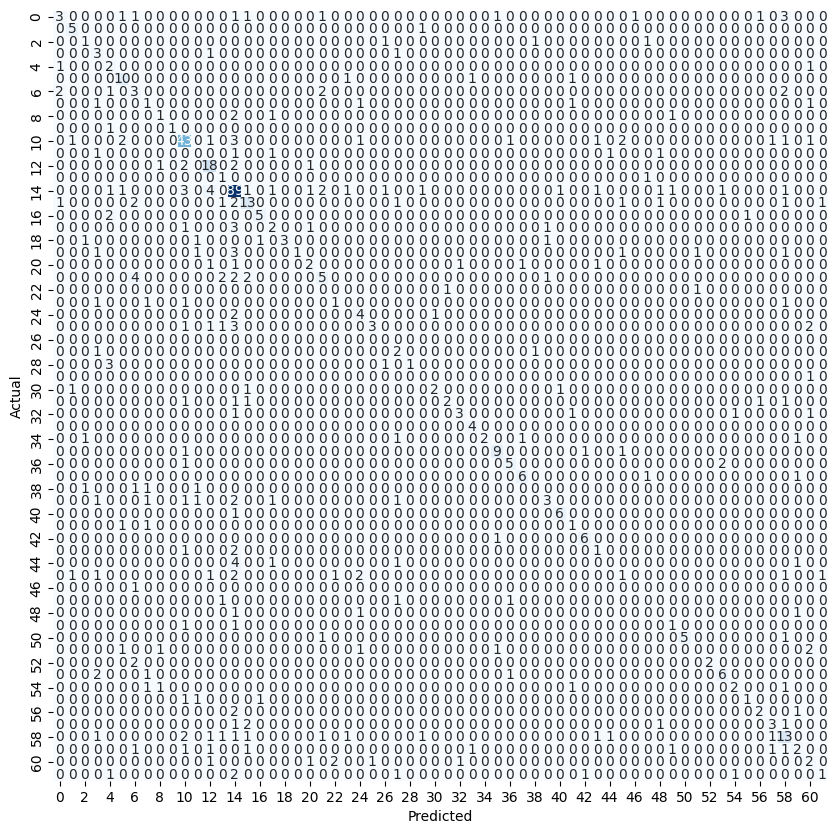

In [ ]:
# showing the result of the prediction
# accuracy, f1 score, confusion matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Weighting each identity to eliminate bias
The cell is to test the dataset for bias and eliminate it by giving weight to each identity

In [ ]:
# testing accuracy by identity
# to see if there is any bias in the dataset

from collections import defaultdict
import pandas as pd

test_by_id = defaultdict(list)

for img, id in zip(X_test, y_test):
  test_by_id[id].append((img, id))

accuracy_by_id = {}

for id, test_set in test_by_id.items():
  X_id = [x[0] for x in test_set]
  y_id = [x[1] for x in test_set]

  y_pred_id = svm.predict(X_id)
  acc = accuracy_score(y_id, y_pred_id)

  accuracy_by_id[id] = acc

num_imgs_by_id = {id:len(test_by_id[id]) for id in test_by_id}

ids_by_img_count = defaultdict(list)
for id, img_count in num_imgs_by_id.items():
  ids_by_img_count[img_count].append(id)

# Capture print output
records = []
for img_count, ids in ids_by_img_count.items():
  for id in ids:
    num_imgs = num_imgs_by_id[id]
    acc = accuracy_by_id[id]

    record = {
      "Identity": id,
      "Images": num_imgs,
      "Accuracy": acc
    }

    records.append(record)

# Create dataframe
df = pd.DataFrame(records)

df.head(20)

,Identity,Images,Accuracy
0,Naomi_Watts,7,0.000000
1,Hans_Blix,7,0.285714
2,John_Ashcroft,7,0.285714
3,Megawati_Sukarnoputri,7,0.857143
4,Luiz_Inacio_Lula_da_Silva,7,0.857143
5,John_Negroponte,7,0.428571
6,Guillermo_Coria,7,0.428571
7,Roh_Moo-hyun,7,0.714286
8,Winona_Ryder,7,0.142857
9,Jacques_Chirac,7,0.571429
